## <center>Predict whether the Credit Card Transaction is Fraud or not?</center>

**Context :**
        It is important that credit card companies are able to recognize fraudulent credit card transactions
so that customers are not charged for items that they did not purchase.

**The Problem Statement :**
The challenge is to recognize fraudulent credit card transactions so that the customers of credit
card companies are not charged for items that they did not purchase.

**Main challenges involved in credit card fraud detection are :**
* Enormous Data is processed every day and the model build must be fast enough to respond to the
scam in time.
* Imbalanced Data i.e most of the transactions (99.8%) are not fraudulent which makes it really
hard for detecting the fraudulent ones
* Data availability as the data is mostly private.
* Misclassified Data can be another major issue, as not every fraudulent transaction is caught and
reported.
* Adaptive techniques used against the model by the scammers.
* How to tackle these challenges?
* The model used must be simple and fast enough to detect the anomaly and classify it as a
fraudulent transaction as quickly as possible.
* Imbalance can be dealt with by properly using some methods which we will talk about in the next
paragraph
* For protecting the privacy of the user the dimensionality of the data can be reduced.
* A more trustworthy source must be taken which double-checks the data, at least for training the
model.
* We can make the model simple and interpretable so that when the scammer adapts to it with just
some tweaks we can have a new model up and running to deploy.

**Dataset Link :** https://www.kaggle.com/kartik2112/fraud-detection

**Author :**
   
    ---> Pavan Sai Kandi
***Linkedin Profile :*** www.linkedin.com/in/itz-me-pavan-sai   
    

## Importing the required Libraries

In [ ]:
# Importing the required Libraries

# For mathematical operations
import numpy as np
# For dataframe operations
import pandas as pd

# For data visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# For machine learning algorithms
import sklearn
# For resampling the Target Data
import imblearn

# Setting up the size of the figures
plt.rcParams["figure.figsize"] = (16, 6)
# Setting up the style of the plot
plt.style.use("fivethirtyeight")

# For supressing warnings
import warnings
warnings.filterwarnings("ignore")

# For displaying maximum rows and columns
pd.options.display.max_columns = 100
pd.options.display.max_rows = 900

### Reading the Dataset

In [ ]:
# Reading the test dataset

test_data = pd.read_csv("fraudTest.csv")

## Exploratory Data Analysis (EDA)

### Examining the Data

In [ ]:
# Shape of the test dataset

print("Shape of the Testing Data : ", test_data.shape)

Shape of the Testing Data :  (555719, 23)


In [ ]:
# Columns in the testing data

test_data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
# Top five records of testing dataset

test_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [ ]:
# Bottom five records of testing dataset

test_data.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,MO,63453,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,TX,77566,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,WA,99323,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,ID,83643,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0
555718,555718,2020-12-31 23:59:34,4170689372027579,fraud_Dare-Marvin,entertainment,38.13,Samuel,Frey,M,830 Myers Plaza Apt. 384,Edmond,OK,73034,35.6665,-97.4798,116001,Media buyer,1993-05-10,1765bb45b3aa3224b4cdcb6e7a96cee3,1388534374,36.210097,-97.036372,0


In [ ]:
# Basic Information of the test dataset
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [ ]:
# Values in trans_date_trans_time (test data)

test_data["trans_date_trans_time"].value_counts().head()

2020-12-17 20:36:39    4
2020-12-19 16:02:22    4
2020-12-13 17:53:47    4
2020-10-05 19:37:49    4
2020-12-14 19:26:52    3
Name: trans_date_trans_time, dtype: int64

In [ ]:
# Values in merchant (test data)

test_data["merchant"].value_counts().head()

fraud_Kilback LLC      1859
fraud_Cormier LLC      1597
fraud_Schumm PLC       1561
fraud_Kuhn LLC         1521
fraud_Dickinson Ltd    1519
Name: merchant, dtype: int64

In [ ]:
# Values in category (test data)

test_data["category"].value_counts()

gas_transport     56370
grocery_pos       52553
home              52345
shopping_pos      49791
kids_pets         48692
shopping_net      41779
entertainment     40104
personal_care     39327
food_dining       39268
health_fitness    36674
misc_pos          34574
misc_net          27367
grocery_net       19426
travel            17449
Name: category, dtype: int64

In [ ]:
# Values in first (test data)

test_data["first"].value_counts().head()

Christopher    11443
Robert          9076
Jessica         8655
David           8599
Michael         8530
Name: first, dtype: int64

In [ ]:
# Values in last (test data)

test_data["last"].value_counts().head()

Smith        12146
Williams     10056
Davis         9524
Johnson       8556
Rodriguez     7485
Name: last, dtype: int64

In [ ]:
# Values in gender (test data)

test_data["gender"].value_counts()

F    304886
M    250833
Name: gender, dtype: int64

In [ ]:
# Values in street (test data)

test_data["street"].value_counts().head()

444 Robert Mews                  1474
6983 Carrillo Isle               1466
6114 Adams Harbor Suite 096      1462
6296 John Keys Suite 858         1458
43235 Mckenzie Views Apt. 837    1428
Name: street, dtype: int64

In [ ]:
# Values in city (test data)

test_data["city"].value_counts().head()

Birmingham     2423
Meridian       2229
Phoenix        2222
Utica          2204
San Antonio    2182
Name: city, dtype: int64

In [ ]:
# Values in state (test data)

test_data["state"].value_counts()

TX    40393
NY    35918
PA    34326
CA    24135
OH    20147
MI    19671
IL    18960
FL    18104
AL    17532
MO    16501
MN    13719
AR    13484
NC    12868
SC    12541
KY    12506
VA    12506
WI    12370
IN    11959
IA    11819
OK    11379
GA    11277
MD    11152
WV    10838
NJ    10528
NE    10257
KS     9943
LA     8988
MS     8833
WY     8454
WA     8116
OR     7811
TN     7359
NM     7020
ME     6928
ND     6397
CO     5886
SD     5250
MA     5186
MT     5052
VT     5044
UT     4658
AZ     4592
NH     3449
CT     3277
ID     2490
NV     2451
DC     1517
HI     1090
AK      843
RI      195
Name: state, dtype: int64

In [ ]:
# Values in job (test data)

test_data["job"].value_counts().head()

Film/video editor             4119
Exhibition designer           3968
Surveyor, land/geomatics      3756
Naval architect               3750
Designer, ceramics/pottery    3463
Name: job, dtype: int64

In [ ]:
# Values in dob (test data)

test_data["dob"].value_counts().head()

1977-03-23    2408
1988-09-15    1951
1981-08-29    1935
1997-09-22    1474
1997-07-05    1466
Name: dob, dtype: int64

In [ ]:
# Values in trans_num (test data)

test_data["trans_num"].value_counts().head()

97a07ef8761768081469c449609d62ad    1
abfbefa65ee4bdfa2c4c4b5e8d8c3b5b    1
aa26fb7676577636fbfe01917a2ac158    1
3afea803a9343858b6d69270dfa302b9    1
946fe7203517551aa2342be8d5b0a01f    1
Name: trans_num, dtype: int64

In [ ]:
# Values in is_fraud (train data)

test_data["is_fraud"].value_counts()

0    553574
1      2145
Name: is_fraud, dtype: int64

### Descriptive Statistics

In [ ]:
# Descriptive Statistics for Numerical Columns

test_data.describe().style.background_gradient(cmap = "copper")

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,555719.000000,555719.000000,555719.000000,555719.000000,555719.000000,555719.000000,555719.000000,555719.000000,555719.000000,555719.000000
mean,277859.000000,417838695528750528.000000,69.392810,48842.628015,38.543253,-90.231325,88221.887918,1380678865.166780,38.542798,-90.231380,0.003860
std,160422.401459,1309836622980698624.000000,156.745941,26855.283328,5.061336,13.721780,300390.892061,5201104.065916,5.095829,13.733071,0.062008
min,0.000000,60416207185.000000,1.000000,1257.000000,20.027100,-165.672300,23.000000,1371816865.000000,19.027422,-166.671575,0.000000
25%,138929.500000,180042946491150.000000,9.630000,26292.000000,34.668900,-96.798000,741.000000,1376028627.500000,34.755302,-96.905129,0.000000
50%,277859.000000,3521417320836166.000000,47.290000,48174.000000,39.371600,-87.476900,2408.000000,1380761988.000000,39.376593,-87.445204,0.000000
75%,416788.500000,4635330563105903.000000,83.010000,72011.000000,41.894800,-80.175200,19685.000000,1385866984.000000,41.954163,-80.264637,0.000000
max,555718.000000,4992346398065154048.000000,22768.110000,99921.000000,65.689900,-67.950300,2906700.000000,1388534374.000000,66.679297,-66.952026,1.000000


In [ ]:
# Descriptive Statistics for Categorical Columns

test_data.describe(include = "object")

,trans_date_trans_time,merchant,category,first,last,gender,street,city,state,job,dob,trans_num
count,555719,555719,555719,555719,555719,555719,555719,555719,555719,555719,555719,555719
unique,544760,693,14,341,471,2,924,849,50,478,910,555719
top,2020-12-17 20:36:39,fraud_Kilback LLC,gas_transport,Christopher,Smith,F,444 Robert Mews,Birmingham,TX,Film/video editor,1977-03-23,97a07ef8761768081469c449609d62ad
freq,4,1859,56370,11443,12146,304886,1474,2423,40393,4119,2408,1


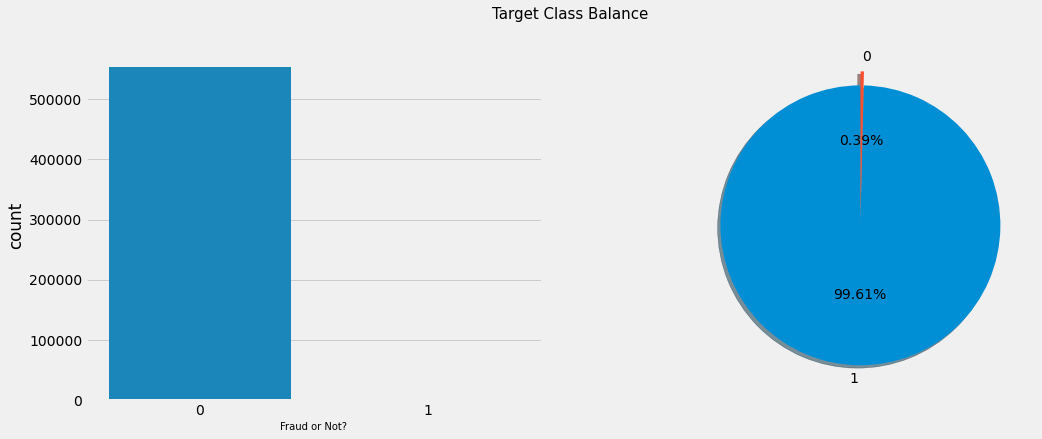

In [ ]:
# Checking Tagret Class Balance

plt.subplot(1, 2, 1)
sns.countplot(test_data["is_fraud"],)
plt.xlabel("Fraud or Not?", fontsize = 10)

plt.subplot(1, 2, 2)
test_data["is_fraud"].value_counts().plot(kind = "pie", explode = [0, 0.1], autopct = "%.2f%%", startangle = 90,
                                       labels = ["1","0"], shadow = True, pctdistance = 0.5)

plt.axis('off')

plt.suptitle('Target Class Balance', fontsize = 15)
plt.show()

Target Class is highly Imbalanced (Resampling should be done)

### Data Cleaning

In [ ]:
# Checking for Missing Values in test dataset
test_data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

No Missing values present

### Outlier Detection

In [ ]:
# Analyzing the Numerical Columns

test_data.select_dtypes("number").head()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,0,2291163933867244,2.86,29209,33.9659,-80.9355,333497,1371816865,33.986391,-81.200714,0
1,1,3573030041201292,29.84,84002,40.3207,-110.4360,302,1371816873,39.450498,-109.960431,0
2,2,3598215285024754,41.28,11710,40.6729,-73.5365,34496,1371816893,40.495810,-74.196111,0
3,3,3591919803438423,60.05,32780,28.5697,-80.8191,54767,1371816915,28.812398,-80.883061,0
4,4,3526826139003047,3.19,49632,44.2529,-85.0170,1126,1371816917,44.959148,-85.884734,0


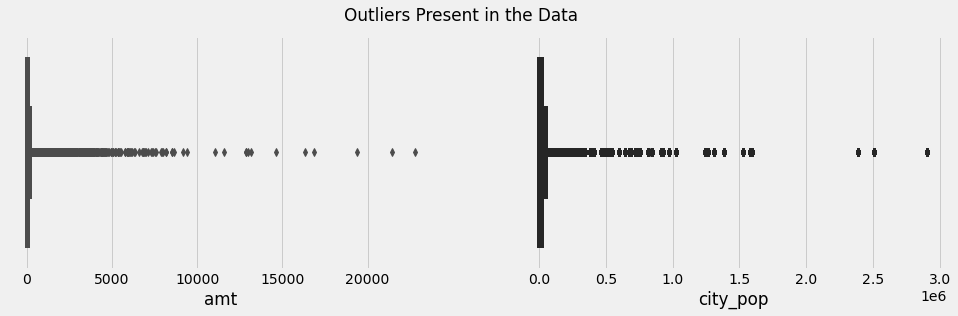

In [ ]:
# Visualize the outliers using Box Plot

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 4)

plt.subplot(1, 2, 1)
sns.boxplot(test_data['amt'], color = "blue")

plt.subplot(1, 2, 2)
sns.boxplot(test_data['city_pop'], color = "green")

plt.suptitle('Outliers Present in the Data')
plt.show()

In [ ]:
# Removing outliers from amt Column from test dataset

# Shape before removing outliers
print("Before Removing Outliers ", test_data.shape)

# Filtering the amt having more than 12000
test_data = test_data[test_data["amt"] < 12000]

# Shape after removing outliers
print("After Removing Outliers ", test_data.shape)

Before Removing Outliers  (555719, 23)
After Removing Outliers  (555709, 23)


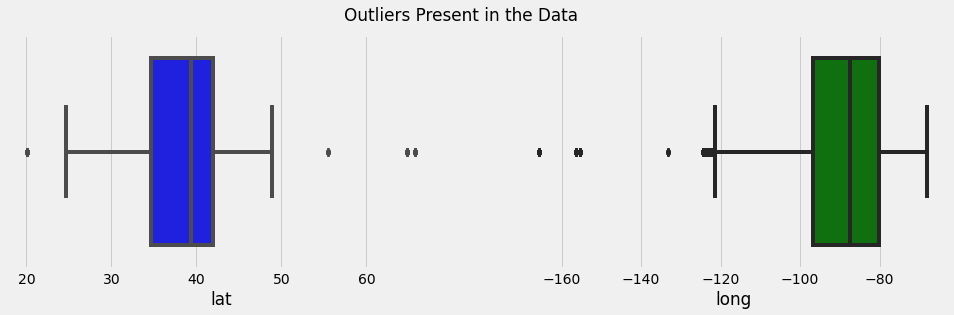

In [ ]:
# Visualize the outliers using Box Plot

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 4)

plt.subplot(1, 2, 1)
sns.boxplot(test_data['lat'], color = "blue")

plt.subplot(1, 2, 2)
sns.boxplot(test_data['long'], color = "green")

plt.suptitle('Outliers Present in the Data')
plt.show()

In [ ]:
# Removing outliers from lat and long Columns from test dataset

# Shape before removing outliers
print("Before Removing Outliers ", test_data.shape)

# Filtering the lat and long columns
test_data = test_data[test_data["lat"] < 50]
#test_data = test_data[test_data["long"] > -125 ]

# Shape after removing outliers
print("After Removing Outliers ", test_data.shape)

Before Removing Outliers  (555709, 23)
After Removing Outliers  (554866, 23)


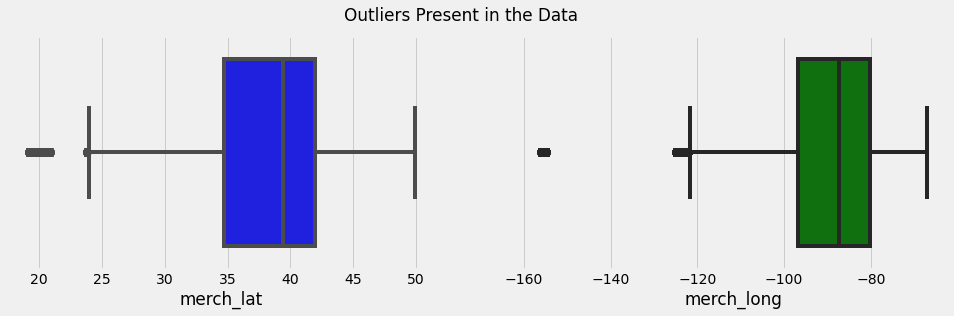

In [ ]:
# Visualize the outliers using Box Plot

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 4)

plt.subplot(1, 2, 1)
sns.boxplot(test_data['merch_lat'], color = "blue")

plt.subplot(1, 2, 2)
sns.boxplot(test_data['merch_long'], color = "green")

plt.suptitle('Outliers Present in the Data')
plt.show()

In [ ]:
# Removing outliers from merch_lat and merch_long Columns from test dataset

# Shape before removing outliers
print("Before Removing Outliers ", test_data.shape)

# Filtering the merch_lat and merch_long columns
test_data = test_data[test_data["merch_lat"] > 22]
test_data = test_data[test_data["merch_long"] > -125 ]

# Shape after removing outliers
print("After Removing Outliers ", test_data.shape)

Before Removing Outliers  (554866, 23)
After Removing Outliers  (553531, 23)


### Univariate Analysis

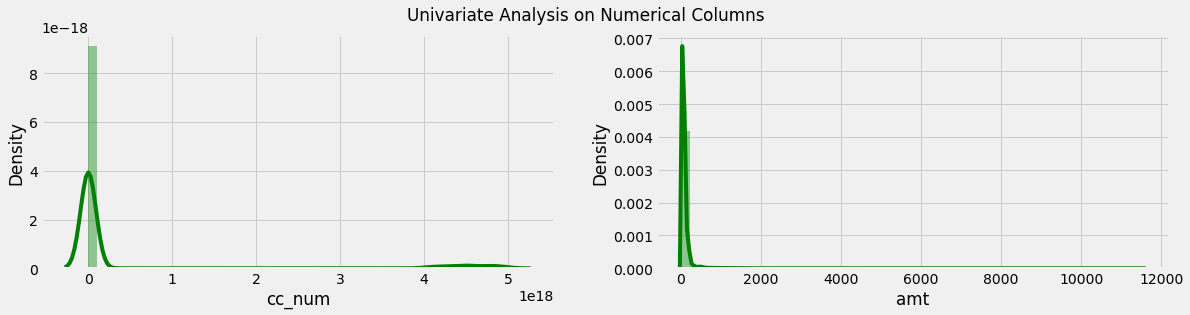

In [ ]:
# Univariate Analysis on Numerical Columns

plt.rcParams['figure.figsize'] = (18, 4)

plt.subplot(1,2, 1)
sns.distplot(test_data['cc_num'], color = 'green')

plt.subplot(1,2, 2)
sns.distplot(test_data['amt'], color = 'green')

plt.suptitle('Univariate Analysis on Numerical Columns')
plt.show()

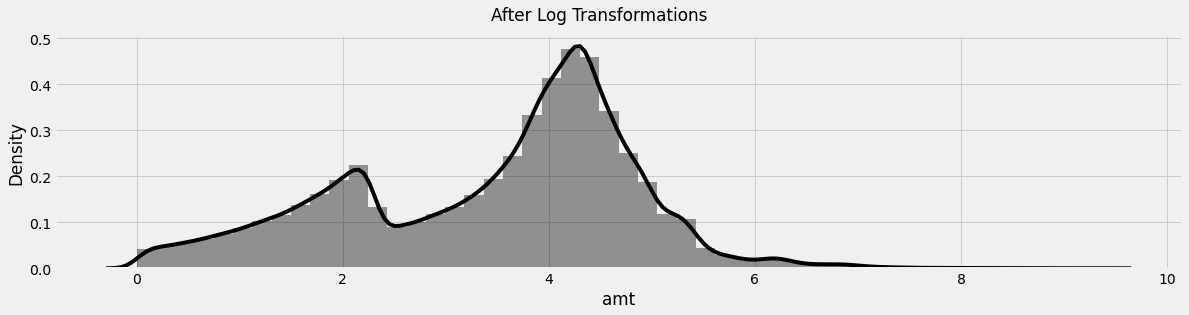

In [ ]:
# Removing skewness from amt, as it can add bias to the data

plt.rcParams['figure.figsize'] = (18, 4)

# Applying log transformation to remove skewness
test_data['amt'] = np.log(test_data['amt'])

# Plotting them and check whether the skewness is removed or not
sns.distplot(test_data['amt'], color = 'black')

plt.suptitle('After Log Transformations')
plt.show()

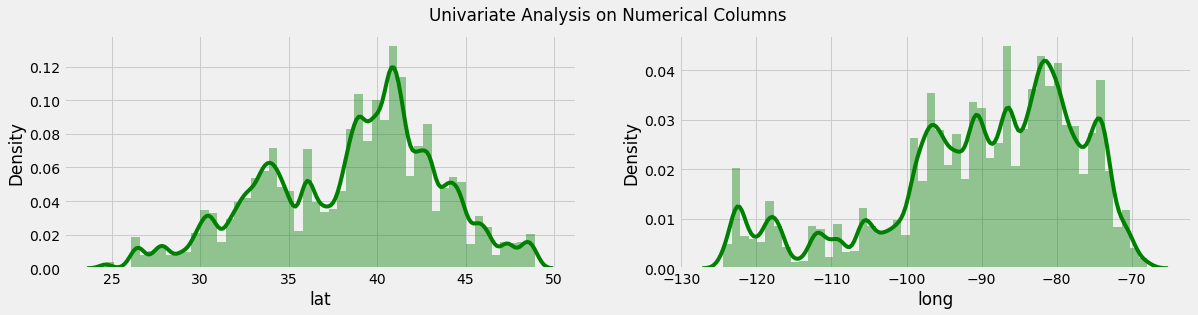

In [ ]:
# Univariate Analysis on Numerical Columns

plt.rcParams['figure.figsize'] = (18, 4)

plt.subplot(1,2, 1)
sns.distplot(test_data['lat'], color = 'green')

plt.subplot(1,2, 2)
sns.distplot(test_data['long'], color = 'green')

plt.suptitle('Univariate Analysis on Numerical Columns')
plt.show()

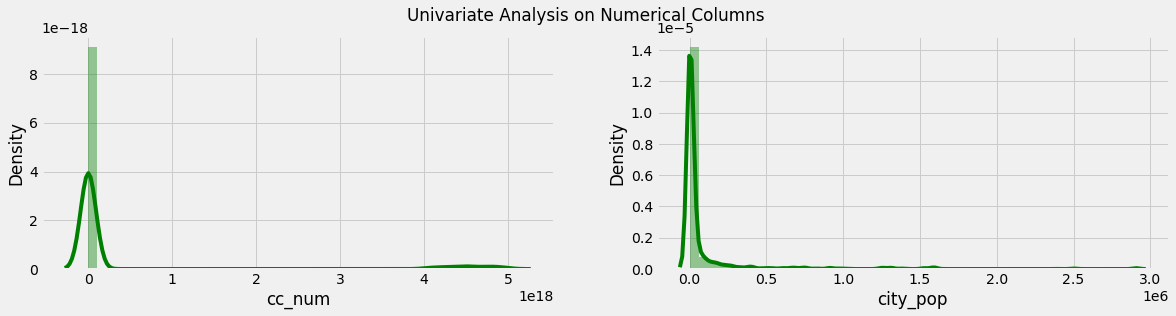

In [ ]:
# Univariate Analysis on Numerical Columns

plt.rcParams['figure.figsize'] = (18, 4)

plt.subplot(1,2, 1)
sns.distplot(test_data['cc_num'], color = 'green')

plt.subplot(1,2, 2)
sns.distplot(test_data['city_pop'], color = 'green')

plt.suptitle('Univariate Analysis on Numerical Columns')
plt.show()

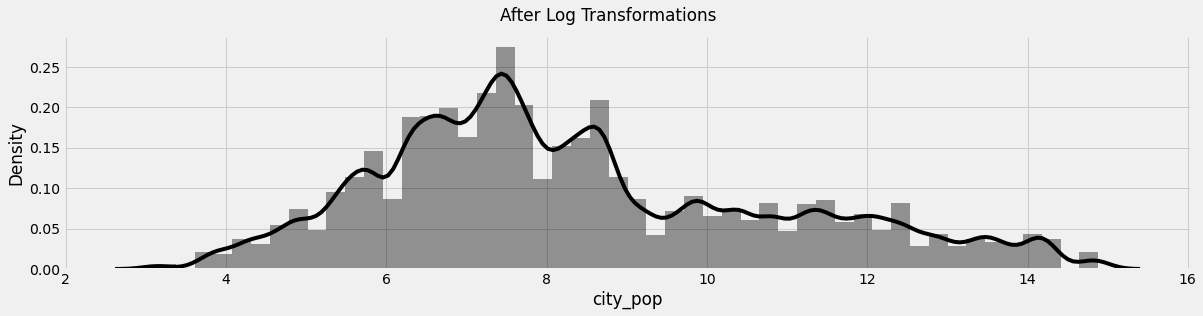

In [ ]:
# Removing skewness from city_pop, as it can add bias to the data

plt.rcParams['figure.figsize'] = (18, 4)

# Applying log transformation to remove skewness
test_data['city_pop'] = np.log(test_data['city_pop'])

# Plotting them and check whether the skewness is removed or not
sns.distplot(test_data['city_pop'], color = 'black')

plt.suptitle('After Log Transformations')
plt.show()

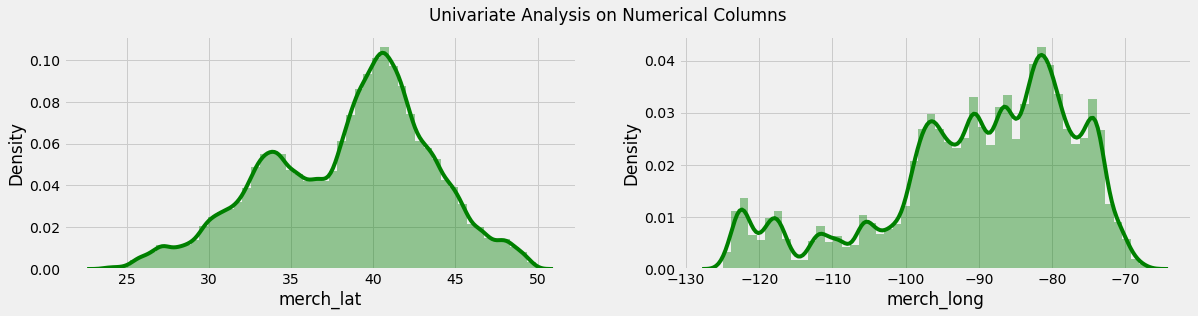

In [ ]:
# Univariate Analysis on Numerical Columns

plt.rcParams['figure.figsize'] = (18, 4)

plt.subplot(1,2, 1)
sns.distplot(test_data['merch_lat'], color = 'green')

plt.subplot(1,2, 2)
sns.distplot(test_data['merch_long'], color = 'green')

plt.suptitle('Univariate Analysis on Numerical Columns')
plt.show()

<AxesSubplot:xlabel='unix_time', ylabel='Density'>

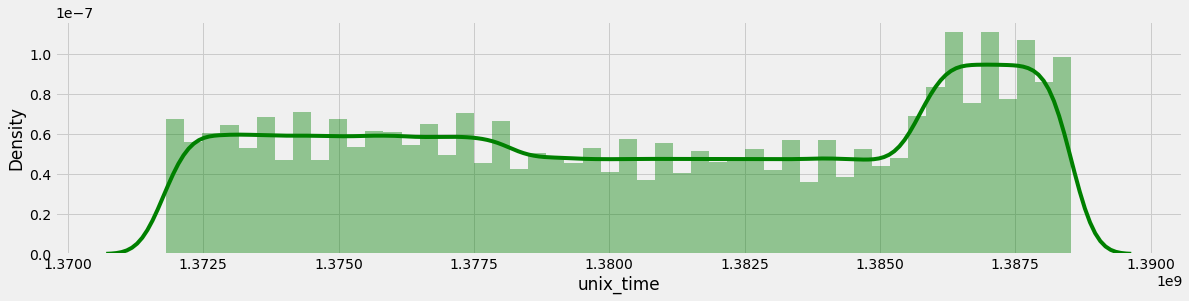

In [ ]:
sns.distplot(test_data['unix_time'], color = 'green')

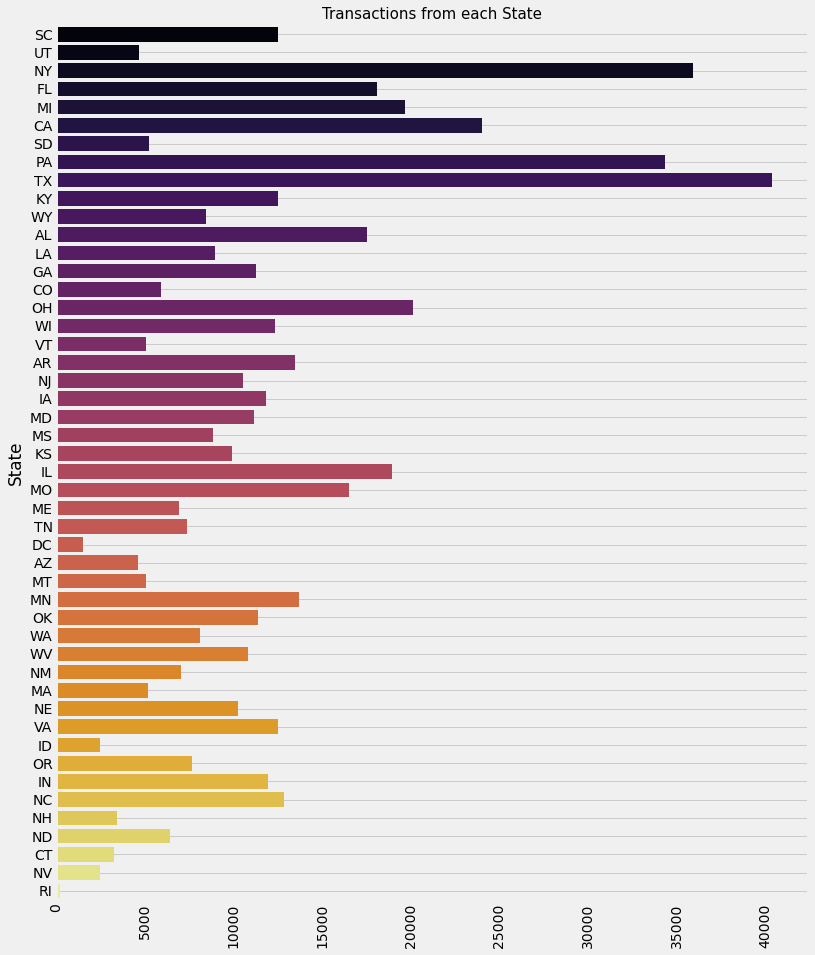

In [ ]:
# Distribution of different States

plt.rcParams['figure.figsize'] = (12,15)
plt.style.use('fast')
sns.countplot(y = test_data['state'], palette = 'inferno', orient = 'v')
plt.xlabel('')
plt.ylabel('State')
plt.title('Transactions from each State', fontsize = 15)
plt.xticks(rotation = 90)
plt.grid()
plt.show()

<AxesSubplot:ylabel='gender'>

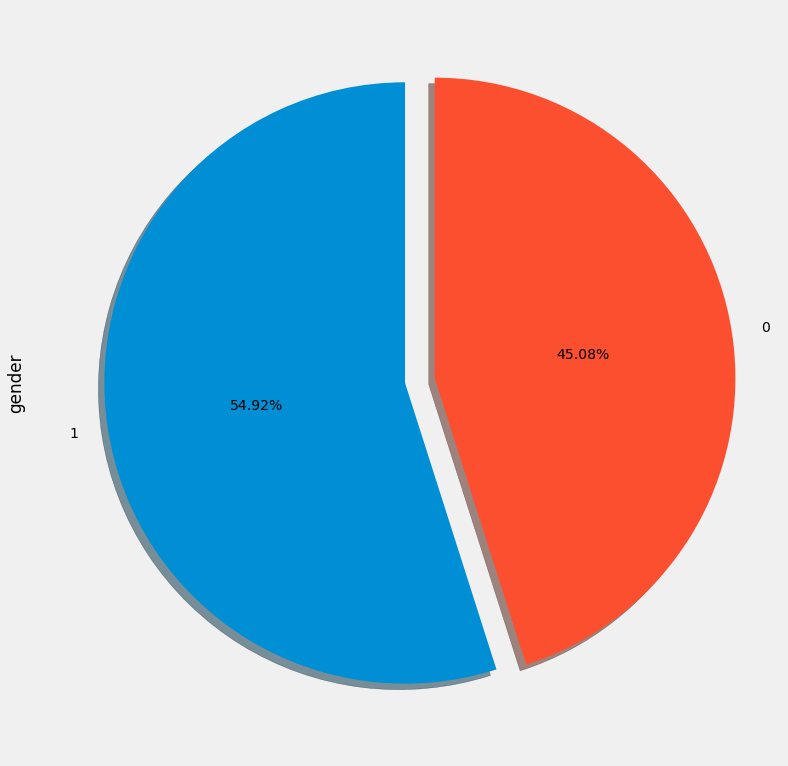

In [ ]:
test_data["gender"].value_counts().plot(kind = "pie", explode = [0, 0.1], autopct = "%.2f%%", startangle = 90,
                                       labels = ["1","0"], shadow = True, pctdistance = 0.5)

### Bivariate Analysis

In [ ]:
test_data.select_dtypes("object").head()

,trans_date_trans_time,merchant,category,first,last,gender,street,city,state,job,dob,trans_num
0,2020-06-21 12:14:25,fraud_Kirlin and Sons,personal_care,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3
1,2020-06-21 12:14:33,fraud_Sporer-Keebler,personal_care,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7
2,2020-06-21 12:14:53,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be
3,2020-06-21 12:15:15,fraud_Haley Group,misc_pos,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c
4,2020-06-21 12:15:17,fraud_Johnston-Casper,travel,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b


In [ ]:
# Comparing the Categories with respect to the output(Target) to understand the Overall Impact

print("Impact of gender on is_fraud(Target)")
print(pd.crosstab(test_data['is_fraud'], test_data['gender']))
print('\n')

print("Impact of state on is_fraud(Target)")
print(pd.crosstab(test_data['is_fraud'], test_data['state']))
print('\n')

Impact of gender on is_fraud(Target)
gender         F       M
is_fraud                
0         302814  248595
1           1164     958


Impact of state on is_fraud(Target)
state        AL     AR    AZ     CA    CO    CT    DC     FL     GA     IA  \
is_fraud                                                                     
0         17469  13450  4565  23959  5884  3237  1507  18049  11219  11750   
1            63     34    27     76     2    40    10     53     58     69   

state       ID     IL     IN    KS     KY    LA    MA     MD    ME     MI  \
is_fraud                                                                    
0         2468  18884  11882  9906  12439  8966  5168  11106  6913  19610   
1           22     76     75    37     67    22    18     46    15     61   

state        MN     MO    MS    MT     NC    ND     NE    NH     NJ    NM  \
is_fraud                                                                    
0         13646  16430  8779  5014  12821  6370  

### Multivariate Analysis

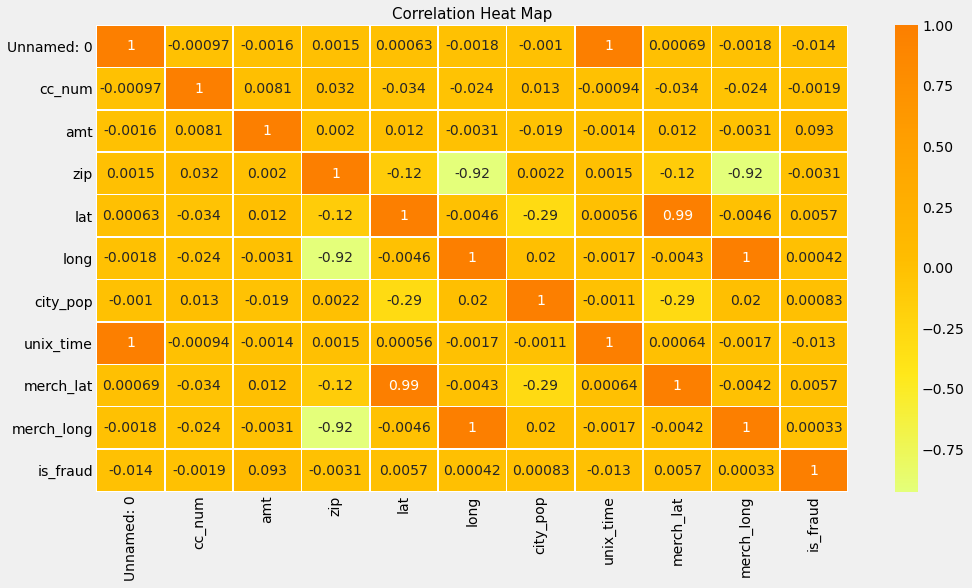

In [ ]:
# Heat Map for the Data with respect to correlation

plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(test_data.corr(), annot = True, linewidth = 0.5, cmap = 'Wistia')
plt.title('Correlation Heat Map', fontsize = 15)
plt.show()

## Feature Engineering

In [ ]:
# Removing some of the columns which are not very useful for predicting the promotion.

test_data = test_data.drop(['Unnamed: 0', 'trans_date_trans_time', 'first', 'last', 'street', 'city', 'zip', 'dob', 'trans_num'], axis = 1)

# Checking the columns in train and test data set after feature engineering
print("Shape of Test Data Set after Feature Engineering  : ", test_data.shape)

Shape of Test Data Set after Feature Engineering  :  (553531, 14)


### Dealing with Categorical Columns

In [ ]:
# Analyzing the Categorical Columns
test_data.select_dtypes("object").head()

,merchant,category,gender,state,job
0,fraud_Kirlin and Sons,personal_care,M,SC,Mechanical engineer
1,fraud_Sporer-Keebler,personal_care,F,UT,"Sales professional, IT"
2,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,F,NY,"Librarian, public"
3,fraud_Haley Group,misc_pos,M,FL,Set designer
4,fraud_Johnston-Casper,travel,M,MI,Furniture designer


In [ ]:
# Label Encoding for all categorical columns
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

test_data['merchant'] = le.fit_transform(test_data['merchant'])
test_data['category'] = le.fit_transform(test_data['category'])
test_data['gender'] = le.fit_transform(test_data['gender'])
test_data['state'] = le.fit_transform(test_data['state'])
test_data['job'] = le.fit_transform(test_data['job'])

# Checking whether we still have any categorical columns left after encoding
print(test_data.select_dtypes('object').columns)

Index([], dtype='object')


In [ ]:
# Train data after encoding
test_data.head()

,cc_num,merchant,category,amt,gender,state,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,2291163933867244,319,10,1.050822,1,37,33.9659,-80.9355,12.717389,274,1371816865,33.986391,-81.200714,0
1,3573030041201292,591,10,3.395850,0,41,40.3207,-110.4360,5.710427,391,1371816873,39.450498,-109.960431,0
2,3598215285024754,611,5,3.720378,0,31,40.6729,-73.5365,10.448599,258,1371816893,40.495810,-74.196111,0
3,3591919803438423,222,9,4.095178,1,7,28.5697,-80.8191,10.910843,406,1371816915,28.812398,-80.883061,0
4,3526826139003047,292,13,1.160021,1,19,44.2529,-85.0170,7.026427,195,1371816917,44.959148,-85.884734,0


## Feature Selection

### Splitting the Dataset

In [ ]:
# Splitting the target data from the train data
y = test_data['is_fraud']
x = test_data.drop(['is_fraud'], axis = 1)

# lets print the shapes of these newly formed data sets
print("Shape of the x :", x.shape)
print("Shape of the y :", y.shape)

Shape of the x : (553531, 13)
Shape of the y : (553531,)


In [ ]:
# It is very important to resample the data, as the Target class is Highly imbalanced.Here We are going to use Over Sampling Technique to resample the data. 
# Importing the SMOTE algorithm to do the same.

from imblearn.over_sampling import SMOTE
x_resample, y_resample  = SMOTE().fit_resample(x, y.values.ravel())

# Shape of x and y after resampling it
print(x_resample.shape)
print(y_resample.shape)

(1102818, 13)
(1102818,)


In [ ]:
# Checking the value counts of our target variable

print("Before Resampling :")
print(y.value_counts())

print("After Resampling :")
y_resample = pd.DataFrame(y_resample)
print(y_resample[0].value_counts())

Before Resampling :
0    551409
1      2122
Name: is_fraud, dtype: int64
After Resampling :
1    551409
0    551409
Name: 0, dtype: int64


In [ ]:
# Creating a validation set from the training data so that we can check whether the model that we have created is good enough
# Importing the train_test_split library from sklearn to do that

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_resample, y_resample, test_size = 0.2, random_state = 0)

# Printing the shapes again 
print("Shape of the x Train :", x_train.shape)
print("Shape of the y Train :", y_train.shape)
print("Shape of the x Test :", x_test.shape)
print("Shape of the y Test :", y_test.shape)

Shape of the x Train : (882254, 13)
Shape of the y Train : (882254, 1)
Shape of the x Test : (220564, 13)
Shape of the y Test : (220564, 1)


## Feature Scaling

In [ ]:
# It is very import to scale all the features of the dataset into the same scale
# Here, we are going to use the standardization method, which is very commonly used.

# Importing the standard scaler library from sklearn to do that
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Modelling

### Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model1 = DecisionTreeClassifier()
model1.fit(x_train, y_train)

y_pred = model1.predict(x_test)

Training Accuracy : 100.0
Testing Accuracy : 99.24239676465788


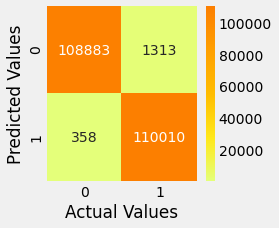

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    110196
           1       0.99      1.00      0.99    110368

    accuracy                           0.99    220564
   macro avg       0.99      0.99      0.99    220564
weighted avg       0.99      0.99      0.99    220564



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print("Training Accuracy :", model1.score(x_train, y_train)*100)
print("Testing Accuracy :", model1.score(x_test, y_test)*100)

cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'Wistia', fmt = '.8g')
plt.ylabel('Predicted Values')
plt.xlabel('Actual Values')
plt.show()

# Classification Report
cr = classification_report(y_test, y_pred)
print(cr)

### Logistic Regression

In [ ]:
# Applying Logistic Regression

from sklearn.linear_model import LogisticRegression

model2 = LogisticRegression()
model2.fit(x_train, y_train)

y_pred = model2.predict(x_test)

Training Accuracy : 79.75866360481221
Testing Accuracy : 79.76777715311655


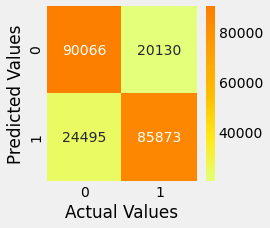

              precision    recall  f1-score   support

           0       0.79      0.82      0.80    110196
           1       0.81      0.78      0.79    110368

    accuracy                           0.80    220564
   macro avg       0.80      0.80      0.80    220564
weighted avg       0.80      0.80      0.80    220564



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print("Training Accuracy :", model2.score(x_train, y_train)*100)
print("Testing Accuracy :", model2.score(x_test, y_test)*100)

cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'Wistia', fmt = '.8g')
plt.ylabel('Predicted Values')
plt.xlabel('Actual Values')
plt.show()

# Classification Report
cr = classification_report(y_test, y_pred)
print(cr)

### KNearest Neighbor (KNN)

In [ ]:
# Applying KNN

from sklearn.neighbors import KNeighborsClassifier

model3 = KNeighborsClassifier()
model3.fit(x_train, y_train)

y_pred = model3.predict(x_test)

Training Accuracy : 99.23457417025028
Testing Accuracy : 98.92502856313814


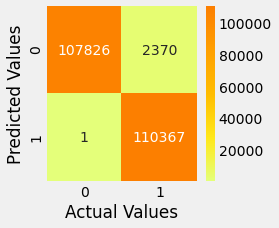

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    110196
           1       0.98      1.00      0.99    110368

    accuracy                           0.99    220564
   macro avg       0.99      0.99      0.99    220564
weighted avg       0.99      0.99      0.99    220564



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print("Training Accuracy :", model3.score(x_train, y_train)*100)
print("Testing Accuracy :", model3.score(x_test, y_test)*100)

cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'Wistia', fmt = '.8g')
plt.ylabel('Predicted Values')
plt.xlabel('Actual Values')
plt.show()

# Classification Report
cr = classification_report(y_test, y_pred)
print(cr)

### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

model4 = GaussianNB()
model4.fit(x_train, y_train)

y_pred = model4.predict(x_test)

Training Accuracy : 80.00281098187143
Testing Accuracy : 79.93960936508225


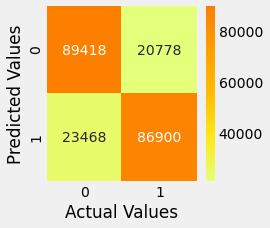

              precision    recall  f1-score   support

           0       0.79      0.81      0.80    110196
           1       0.81      0.79      0.80    110368

    accuracy                           0.80    220564
   macro avg       0.80      0.80      0.80    220564
weighted avg       0.80      0.80      0.80    220564



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print("Training Accuracy :", model4.score(x_train, y_train)*100)
print("Testing Accuracy :", model4.score(x_test, y_test)*100)

cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'Wistia', fmt = '.8g')
plt.ylabel('Predicted Values')
plt.xlabel('Actual Values')
plt.show()

# Classification Report
cr = classification_report(y_test, y_pred)
print(cr)

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model5 = RandomForestClassifier()
model5.fit(x_train, y_train)

y_pred = model5.predict(x_test)

Training Accuracy : 100.0
Testing Accuracy : 99.84539634754537


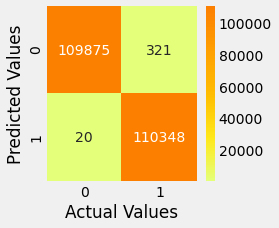

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110196
           1       1.00      1.00      1.00    110368

    accuracy                           1.00    220564
   macro avg       1.00      1.00      1.00    220564
weighted avg       1.00      1.00      1.00    220564



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print("Training Accuracy :", model5.score(x_train, y_train)*100)
print("Testing Accuracy :", model5.score(x_test, y_test)*100)

cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'Wistia', fmt = '.8g')
plt.ylabel('Predicted Values')
plt.xlabel('Actual Values')
plt.show()

# Classification Report
cr = classification_report(y_test, y_pred)
print(cr)

### XGB Classifier

In [ ]:
from xgboost import XGBClassifier

model6 = XGBClassifier()
model6.fit(x_train, y_train)

y_pred = model6.predict(x_test)

[13:45:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Training Accuracy : 99.46988055593967
Testing Accuracy : 99.41241544404346


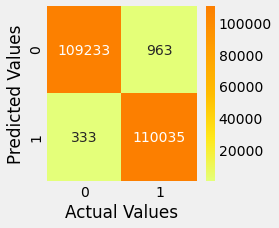

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    110196
           1       0.99      1.00      0.99    110368

    accuracy                           0.99    220564
   macro avg       0.99      0.99      0.99    220564
weighted avg       0.99      0.99      0.99    220564



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print("Training Accuracy :", model6.score(x_train, y_train)*100)
print("Testing Accuracy :", model6.score(x_test, y_test)*100)

cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'Wistia', fmt = '.8g')
plt.ylabel('Predicted Values')
plt.xlabel('Actual Values')
plt.show()

# Classification Report
cr = classification_report(y_test, y_pred)
print(cr)

In [ ]:
dict = {"Model" : [  "Decision Tree Calssifier", 
                         "Logistic Regression", 
                         "KNN", 
                         "Naive Bayes",
                         "Random Forest Classifier",
                         "XGB Classifier"],
       "Accuracy_Score" : [ model1.score(x_test, y_test)*100,
                            model2.score(x_test, y_test)*100,
                            model3.score(x_test, y_test)*100,
                            model4.score(x_test, y_test)*100,
                            model5.score(x_test, y_test)*100,
                            model6.score(x_test, y_test)*100
                            ]}
    

df_acc = pd.DataFrame(dict)
#df_acc["Accuracy_Score"] = np.round(df_acc["Accuracy_Score"])
df_acc

,Model,Accuracy_Score
0,Decision Tree Calssifier,99.242397
1,Logistic Regression,79.767777
2,KNN,98.925029
3,Naive Bayes,79.939609
4,Random Forest Classifier,99.845396
5,XGB Classifier,99.412415


**Accuracy of all Models :**

   * ***Random Forest Classifier :***  99.84
   * ***XGB Classifier :*** 99.41
   * ***Decision Tree Classifier :*** 99.24
   * ***KNN :*** 98.92
   * ***Naive Bayes :*** 79.93
   * ***Logistic Regression :*** 79.76

### Real Time Prediction

In [ ]:
# Random Forest Classifier(model5)

y_test_pred = model5.predict(x_test)
y_test_pred

array([1, 0, 1, ..., 1, 0, 1], dtype=int64)

In [ ]:
test_data.head()

,cc_num,merchant,category,amt,gender,state,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,2291163933867244,319,10,1.050822,1,37,33.9659,-80.9355,12.717389,274,1371816865,33.986391,-81.200714,0
1,3573030041201292,591,10,3.395850,0,41,40.3207,-110.4360,5.710427,391,1371816873,39.450498,-109.960431,0
2,3598215285024754,611,5,3.720378,0,31,40.6729,-73.5365,10.448599,258,1371816893,40.495810,-74.196111,0
3,3591919803438423,222,9,4.095178,1,7,28.5697,-80.8191,10.910843,406,1371816915,28.812398,-80.883061,0
4,3526826139003047,292,13,1.160021,1,19,44.2529,-85.0170,7.026427,195,1371816917,44.959148,-85.884734,0


In [ ]:
# Random Tree Classifier

prediction = model5.predict(np.array([[3591919803438423, #cc_num
                                      222, #merchant
                                      9, #category
                                      60.5, #amt
                                      1, #gender
                                      8, #state
                                      28.5697, #lat
                                      -80.8191, #long
                                      54767, #city_pop
                                      407, #job
                                      1371816915, #unix_time
                                      28.812398, #merch_lat
                                      -80.883061, #merch_long
                              ]]))

print("Whether Credit Card Transaction is fraud or not? : 1-> Fraud Transaction, and 0-> Legit(Not Fraud) Transaction :", prediction)

Whether Credit Card Transaction is fraud or not? : 1-> Fraud Transaction, and 0-> Legit(Not Fraud) Transaction : [0]


**Conclusion :**
   
   After comparing different classification models, We can say that the ***Random Forest Classifier*** is the best model with an Accuracy Score of **99.84%**  followed by ***XGB Classifier*** model with an Accuracy score of **99.41%** followed by ***Decision Tree Classifier*** model with an Accuracy score of **99.24%** followed by ***KNN*** model with an Accuracy score of **98.92%**.

<center><h1>***Thank You***</h1></center>